In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

### Problem 2, (4): solves the modified, stiff version of the problem with 𝑘=10^3 using the implicit Euler method and the 4th-order Runge-Kutta method

In [3]:
# New spring constant
k = 10**3

# Re-define the matrix B with updated spring constant
B = np.array([
    [0, 1, 0, 0],
    [-k, -1, k, 1],
    [0, 0, 0, 1],
    [k, 1, -k, -1]
])

# Initial conditions
X0 = np.array([0, 0, 1, 0])

# Time settings
T = 1
time_steps = [10**0, 10**-1, 10**-2, 10**-3, 10**-4]

# Function to compute the derivative dX/dt = B * X
def derivative(X):
    return B @ X

# Implicit Euler method
def implicit_euler_method(X0, dt, T):
    num_steps = int(T / dt)
    X = X0.copy()
    solution = [X]
    I = np.eye(4)  # Identity matrix for implicit calculation
    for _ in range(num_steps):
        X = solve(I - dt * B, X)  # Solving (I - dt*B) * X_next = X
        solution.append(X)
    return np.array(solution)

# 4th-order Runge-Kutta method
def rk4_method(X0, dt, T):
    num_steps = int(T / dt)
    X = X0.copy()
    solution = [X]
    for _ in range(num_steps):
        k1 = derivative(X)
        k2 = derivative(X + 0.5 * dt * k1)
        k3 = derivative(X + 0.5 * dt * k2)
        k4 = derivative(X + dt * k3)
        X = X + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        solution.append(X)
    return np.array(solution)

# Function to calculate global error
def calculate_global_error(true_solution, numerical_solution):
    return np.linalg.norm(true_solution - numerical_solution, ord=2)

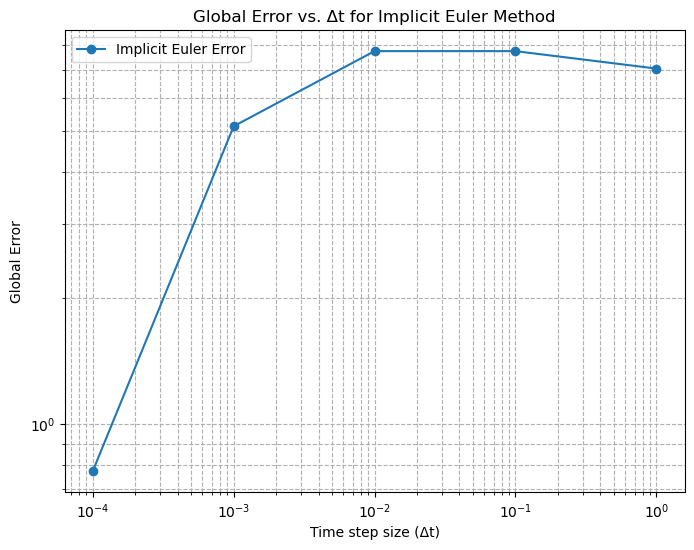

In [4]:
# Part (a): Implicit Euler - Plot global error vs. dt in log-log scale
errors_implicit_euler = []

# Using the RK4 solution with smallest dt as "true" solution
true_solution = rk4_method(X0, 10**-4, T)

for dt in time_steps:
    implicit_solution = implicit_euler_method(X0, dt, T)
    error = calculate_global_error(true_solution[-1], implicit_solution[-1])
    errors_implicit_euler.append(error)
    
# Log-log plot for implicit Euler method errors
plt.figure(figsize=(8, 6))
plt.loglog(time_steps, errors_implicit_euler, '-o', label='Implicit Euler Error')
plt.xlabel('Time step size (Δt)')
plt.ylabel('Global Error')
plt.title('Global Error vs. Δt for Implicit Euler Method')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [5]:
# Part (b): Stability analysis for Runge-Kutta method
# Finding the maximum stable Δt
max_stable_dt = 0
stable_solution_found = False

for dt in time_steps:
    rk4_solution = rk4_method(X0, dt, T)
    if np.all(np.isfinite(rk4_solution)):
        max_stable_dt = dt
        stable_solution_found = True
    else:
        break

if stable_solution_found:
    print(f"Maximum stable Δt for Runge-Kutta method: {max_stable_dt}")
else:
    print("Runge-Kutta method did not find a stable solution for any of the given time steps.")

Maximum stable Δt for Runge-Kutta method: 0.0001
